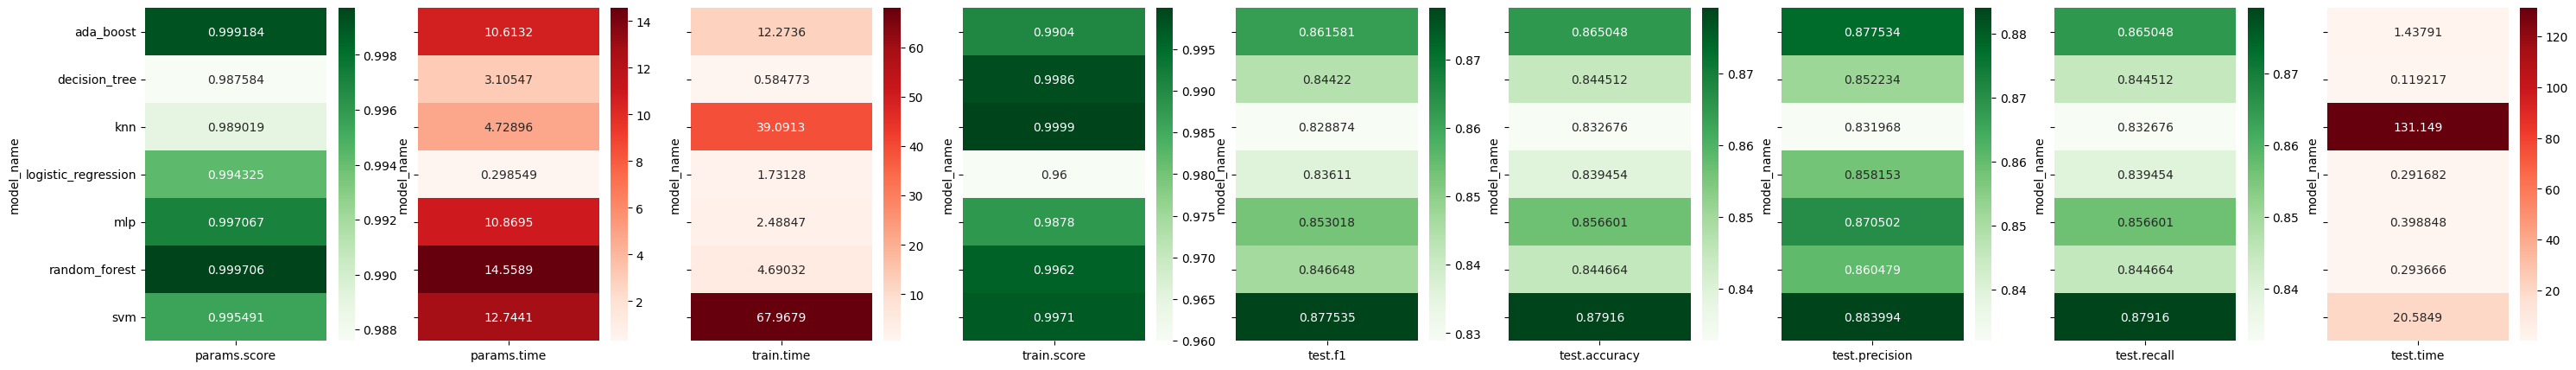

,model_name,params.score,params.time,train.time,train.score,test.f1,test.accuracy,test.precision,test.recall,test.time
0,decision_tree,0.987584,3.105466,0.584773,0.9986,0.844220,0.844512,0.852234,0.844512,0.119217
1,random_forest,0.999706,14.558900,4.690323,0.9962,0.846648,0.844664,0.860479,0.844664,0.293666
2,knn,0.989019,4.728957,39.091341,0.9999,0.828874,0.832676,0.831968,0.832676,131.149452
3,logistic_regression,0.994325,0.298549,1.731281,0.9600,0.836110,0.839454,0.858153,0.839454,0.291682
4,svm,0.995491,12.744086,67.967866,0.9971,0.877535,0.879160,0.883994,0.879160,20.584888
5,mlp,0.997067,10.869498,2.488469,0.9878,0.853018,0.856601,0.870502,0.856601,0.398848
6,ada_boost,0.999184,10.613206,12.273574,0.9904,0.861581,0.865048,0.877534,0.865048,1.437913


In [70]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


def process_results(file_name):
    with open(file_name) as f:
        results = json.load(f)

    processed = []
    for model_name in results:
        res = results[model_name]
        res['model_name'] = model_name

        processed.append(
            res
        )

    return processed


def generate_heatmaps(normalised):
    figure, axes = plt.subplots(1, 9, figsize=(4*9, 5), sharey=True)

    cmaps = ['Greens', 'Reds', 'Reds', 'Greens', 'Greens', 'Greens', 'Greens', 'Greens', 'Reds']

    # create heat maps for each of the columns of the normalised dataframe
    for i, (col, cmap) in enumerate(zip(normalised.columns[1:], cmaps)):
        if col == 'model_name':
            continue

        # create a new dataframe with the model name and the column
        df = pd.DataFrame({
            'model_name': normalised['model_name'],
            col: normalised[col]
        })

        # create a pivot table with the model name as the index and the column as the value
        df = df.pivot_table(index='model_name', values=col)

        # plot the pivot table as a heatmap
        sns.heatmap(df, annot=True, cmap=cmap, ax=axes[i], fmt='g')

    plt.show()


df = process_results('../artefacts/6/results_kdd.json')
normalised = pd.json_normalize(df)
generate_heatmaps(normalised)
normalised


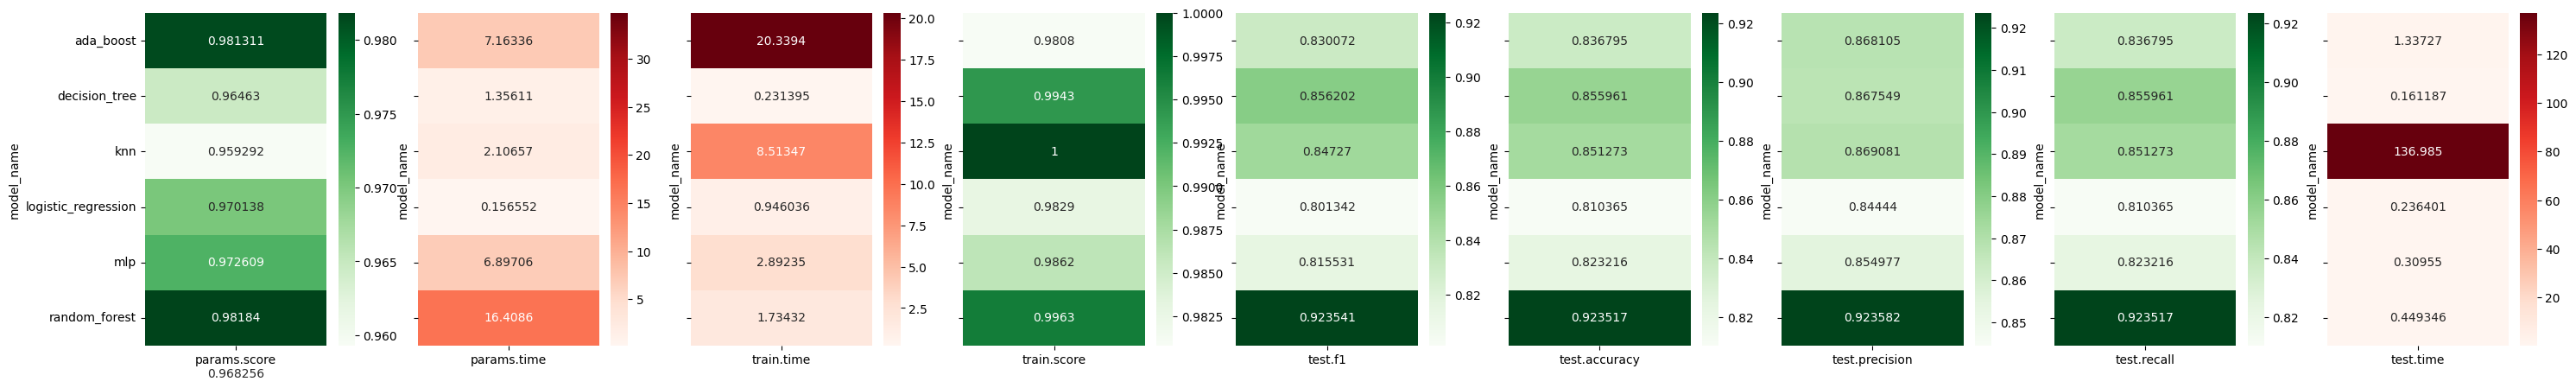

,model_name,params.score,params.time,train.time,train.score,test.f1,test.accuracy,test.precision,test.recall,test.time
0,decision_tree,0.964630,1.356106,0.231395,0.9943,0.856202,0.855961,0.867549,0.855961,0.161187
1,random_forest,0.981840,16.408578,1.734322,0.9963,0.923541,0.923517,0.923582,0.923517,0.449346
2,knn,0.959292,2.106569,8.513475,1.0000,0.847270,0.851273,0.869081,0.851273,136.985167
3,logistic_regression,0.970138,0.156552,0.946036,0.9829,0.801342,0.810365,0.844440,0.810365,0.236401
4,svm,0.968256,34.798546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,mlp,0.972609,6.897057,2.892354,0.9862,0.815531,0.823216,0.854977,0.823216,0.309550
6,ada_boost,0.981311,7.163357,20.339420,0.9808,0.830072,0.836795,0.868105,0.836795,1.337269


In [71]:
df = process_results('../artefacts/6/results_unsw.json')
normalised = pd.json_normalize(df)
generate_heatmaps(normalised)
normalised